# K-means Clustering:

It is unsupervised learning method. Clusting is the task to divide the data points fro
Data points in the same groups are more similar to other data points in the same group
points in other groups.It is basically a collection of objects on the basis of similar
them.


K-means algorithm partition n observations into k clusters where each observation belongs to the cluster with the nearest mean serving as a prototype


Kmeans Clustering Steps:

Step 1:choose number of clusters, K

step 2:select at random k points, take the centroids

step 3:assign each datapoint to the closest centroid by euclidean distance

step 4:compute and place the new centroid of each cluster

step 5:Re-assign each datapoint to the new closest centroid.
if any assignment took place goto step 4. 


IRIS DATASET: The dataset contain 3 categories of 50 examples refers to a type of iris
Their are four features: sepal length, sepal width, petal length, and petal width.
The last feature is for species, which holds the value for these types of plants.

In [1]:
# Importing the libraries
import numpy as np
#for plotting
import matplotlib.pyplot as plt
#import and manage datasets
import pandas as pd
from sklearn.cluster import KMeans


In [3]:
#importing dataset using pandas
# Importing the dataset
#pd as a dataframe
dataset = pd.read_csv('Iris.csv')


In [4]:
dataset.shape


(150, 6)

In [5]:
dataset.head(4)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa


In [6]:
dataset.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
dataset.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [8]:
dataset.isnull().values.any()

False

In [9]:
X = dataset.iloc[:, [0,1,2,3]].values


In [10]:
#applying k-means to the mall dataset, with 5 cluster
kmeans = KMeans(n_clusters = 7, init = 'k-means++',max_iter = 300,n_init=10)

In [11]:
#fit the model to the datasets
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [12]:
kmeans.cluster_centers_

array([[118.5       ,   6.62727273,   2.93636364,   5.58181818],
       [ 33.        ,   4.96190476,   3.32857143,   1.45238095],
       [ 96.        ,   5.93043478,   2.82608696,   4.60869565],
       [ 74.        ,   6.04761905,   2.76190476,   4.33809524],
       [ 11.5       ,   5.05454545,   3.48636364,   1.45      ],
       [140.        ,   6.62380952,   3.03333333,   5.49047619],
       [ 53.5       ,   5.64      ,   3.01      ,   3.31      ]])

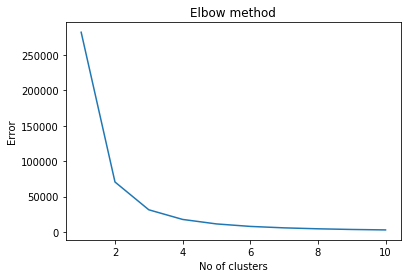

In [13]:
#Elbow method
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()


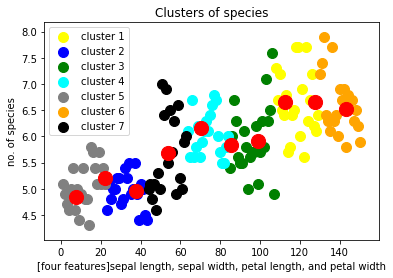

In [23]:
#visualizing the cluster
#x and y coordinate, size of data points, color
#visualizing the cluster
#x and y coordinate, size of data points, color
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'grey', label = 'cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'orange', label = 'cluster 6')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6, 1], s = 100, c = 'black', label = 'cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'Red')
plt.title('Clusters of species')
plt.xlabel('[four features]sepal length, sepal width, petal length, and petal width')
plt.ylabel('no. of species')
plt.legend()
plt.show()
